In [185]:
 # import relevant packages
import numpy as np
import mnist_reader
import matplotlib.pyplot as plt

In [186]:
 # load data sets
X_train, y_train = mnist_reader.load_mnist('.', kind='train')
X_test, y_test = mnist_reader.load_mnist('.', kind='t10k')

In [187]:
t_shirt = 0
trousers = 1
pullover = 2
dress = 3
coat = 4
sandal = 5
shirt = 6
sneaker = 7
bag = 8
ankle_boot = 9

In [188]:
def get_clothes(x_set, y_set, clothestype):
    idx = np.where(y_set==clothestype)

    return x_set[idx], y_set[idx]

def get_mixedclothes(x_set, y_set, clothestypes):
    # Select the data of the two types of clothes
    idxall = np.where(np.logical_or(y_set==clothestypes[0], y_set==clothestypes[1]))
    newxset = x_set[idxall]
    newyset = np.int8(y_set[idxall])    # Need to change type to allow negative numbers

    # Then modify the y set to be either -1 or 1
    newyset[np.where(newyset==clothestypes[0])] = -1
    newyset[np.where(newyset==clothestypes[1])] =  1

    # return new values
    return newxset, newyset

array([ 1, -1, -1, -1, -1,  1,  1, -1, -1, -1], dtype=int8)

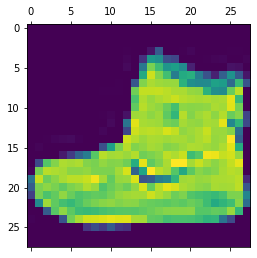

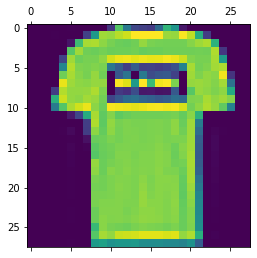

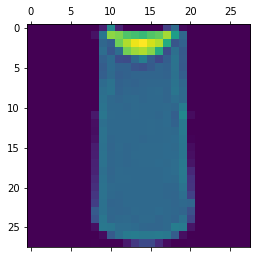

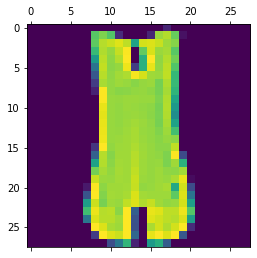

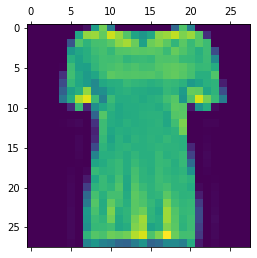

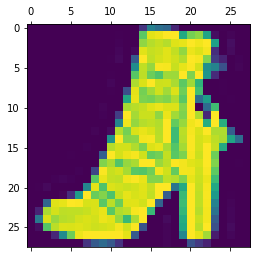

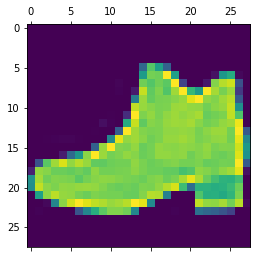

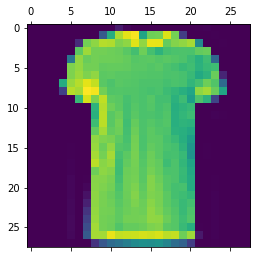

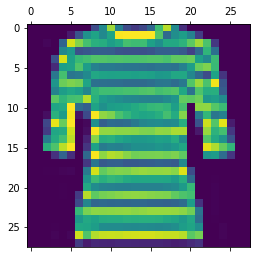

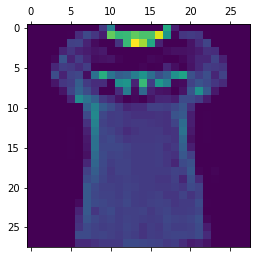

In [189]:
xset, yset = get_mixedclothes(X_train, y_train, [0,9])
for i in range(0,10):
    plt.matshow(xset[i].reshape(28,28))
yset[0:10]

In [217]:
def train_simple_perceptron(w, xset, yset):
    linearlySeparated = False

    ## Loop through the pairs of x and y until they are linearly separated
    iterations = 0  # count the number of iterations
    while not linearlySeparated:
        m = 0
        
        # Loop through the pairs
        for idx, y in enumerate(yset):
            # Check if this point is misclassified
            x = xset[idx]
            if y*np.dot(w,x) <= 0:
                # It is so count the number of misclassifications and change w
                m += 1
                w += y*x

        # Increase the count of iterations
        iterations += 1

        # Check the number of misclassifications
        if m == 0:
            print("Successfully classified in {} iterations".format(iterations))
            linearlySeparated = True
        elif iterations > 100:
            print("Failed to classify in max iterations")
            iterations = -1
            break

    return w, iterations

def mnist_test_perceptron(xtest,ytest,clothestypes, w, plotbad=False):
    xset, yset = get_mixedclothes(xtest, ytest, clothestypes)

    correct   = 0
    incorrect = 0
    for idx, y in enumerate(yset):
        x = xset[idx]

        if y*np.dot(w,x)>0:
            correct += 1
        else:
            if plotbad:
                plt.matshow(x.reshape(28,28))
            incorrect += 1

    print(correct,incorrect)
    return correct/(correct+incorrect)

def mnist_simple_perceptron(xtrain,ytrain,clothestypes):
    xset, yset = get_mixedclothes(X_train, y_train, clothestypes)
    w = np.zeros(xset.shape[1])

    return train_simple_perceptron(w,xset,yset)


In [221]:
clothestypes = [t_shirt, bag]
w, iters = mnist_simple_perceptron(X_train,y_train,clothestypes)
print(mnist_test_perceptron(X_test,y_test,clothestypes, w, plotbad=True))

Failed to classify in max iterations
1941 59
0.9705


12871556.0


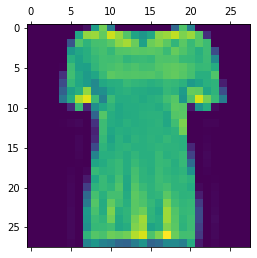

In [211]:
idx = 4
print(np.dot(X_test[idx],w))
plt.matshow(xset[idx].reshape(28,28))